# Loading Packages

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt  # For plotting graphs 
%matplotlib inline 
import warnings   # To ignore any warnings warnings.filterwarnings("ignore")

# Reading data

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Training Machine Learning/Transformed_Housing_Data2.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,26,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


# Understanding Data

In [5]:
#check the features present in our data
data.columns

Index(['Sale_Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'No of Times Visited', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'Years Since Renovation',
       'Condition_of_the_House_Excellent', 'Condition_of_the_House_Fair',
       'Condition_of_the_House_Good', 'Condition_of_the_House_Okay',
       'Ever_Renovated_Yes', 'Waterfront_View_Yes',
       'Zipcode_Group_Zipcode_Group_1', 'Zipcode_Group_Zipcode_Group_2',
       'Zipcode_Group_Zipcode_Group_3', 'Zipcode_Group_Zipcode_Group_4',
       'Zipcode_Group_Zipcode_Group_5', 'Zipcode_Group_Zipcode_Group_6',
       'Zipcode_Group_Zipcode_Group_7', 'Zipcode_Group_Zipcode_Group_8',
       'Zipcode_Group_Zipcode_Group_9'],
      dtype='object')

In [6]:
# the shape of the dataset.
data.shape

(21609, 31)

### Q1:   Find out statistical information about features using describe function in the dataset?


In [7]:
data.describe()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
count,2.160900e+04,21609.000000,21609.000000,21609.000000,2.160900e+04,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000
mean,5.116186e+05,3.370771,2.114709,2079.872553,1.510641e+04,1.494215,0.234347,7.623490,1788.319589,291.513490,46.999722,47.560050,-122.213875,1986.553242,12769.770790,0.884122,0.078717,0.649174,0.262761,0.007960,0.042297,0.007543,0.109399,0.188625,0.149706,0.186681,0.043824,0.076450,0.012449,0.027720,0.002314
std,2.500620e+05,0.929916,0.770097,918.347816,4.142353e+04,0.539909,0.766382,1.105519,827.977604,442.570991,29.373317,0.138556,0.140832,685.427485,27306.508841,5.279629,0.269303,0.477240,0.440144,0.088863,0.201271,0.086525,0.312146,0.391220,0.356791,0.389665,0.204709,0.265722,0.110879,0.164173,0.048048
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,0.000000,3.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,7.000000,1190.000000,0.000000,21.000000,47.471000,-122.328000,1490.000000,5100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,7.000000,1560.000000,0.000000,43.000000,47.571800,-122.230000,1840.000000,7620.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068700e+04,2.000000,0.000000,8.000000,2210.000000,560.000000,67.000000,47.678000,-122.125000,2360.000000,10084.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.129575e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,10.000000,9410.000000,4820.000000,118.000000,47.777600,-121.315000,6210.000000,871200.000000,83.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Q2: Find out the number of missing values for each feature in the dataset ?

In [8]:
data.isnull().sum()

Sale_Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
No of Times Visited                          0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
Years Since Renovation                       0
Condition_of_the_House_Excellent             0
Condition_of_the_House_Fair                  0
Condition_of_the_House_Good                  0
Condition_of_the_House_Okay                  0
Ever_Renovated_Yes                           0
Waterfront_Vi

### Q3: If sales price is greater/less than 2 standard deviation from the mean sale price then delete such rows?
* How the shape of data will change after removing these values ?

In [9]:
print("Before deleting outliers length = " , len(data))                
target = data['Sale_Price']
target_mean = target.mean()
target_sd = target.std(ddof=0)
data = data.drop(data[target>target_mean+2*target_sd].index|data[target<target_mean-2*target_sd].index,axis=0)
print("After deleting outliers length = " , len(data)) 

Before deleting outliers length =  21609
After deleting outliers length =  20173


### Q4: Divide the features into Numerical and Categorical type ?

In [10]:
Numerical_Type = ['Sale_Price','No of Bedrooms','No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','No of Floors',
   'No of Times Visited',                         
   'Overall Grade'  ,                           
   'Area of the House from Basement (in Sqft)' ,
   'Basement Area (in Sqft)'    ,                
   'Age of House (in Years)'  ,                 
   'Latitude'  ,                               
   'Longitude'   ,                              
   'Living Area after Renovation (in Sqft)',     
   'Lot Area after Renovation (in Sqft)'  
  ,'Years Since Renovation']

Categorical_Type = ['Condition_of_the_House_Excellent',          
   'Condition_of_the_House_Fair',  
   'Condition_of_the_House_Good',  
   'Condition_of_the_House_Okay' ,                
   'Ever_Renovated_Yes'        ,                 
   'Waterfront_View_Yes','Zipcode_Group_Zipcode_Group_1' ,              
   'Zipcode_Group_Zipcode_Group_2',             
   'Zipcode_Group_Zipcode_Group_3',               
   'Zipcode_Group_Zipcode_Group_4',               
   'Zipcode_Group_Zipcode_Group_5',               
   'Zipcode_Group_Zipcode_Group_6',               
   'Zipcode_Group_Zipcode_Group_7',               
   'Zipcode_Group_Zipcode_Group_8',               
   'Zipcode_Group_Zipcode_Group_9']



numerical_features   = data[Numerical_Type]
categorical_features = data[Categorical_Type]

numerical_features,categorical_features

    

(       Sale_Price  ...  Years Since Renovation
 0        221900.0  ...                       0
 1        538000.0  ...                      26
 2        180000.0  ...                       0
 3        604000.0  ...                       0
 4        510000.0  ...                       0
 ...           ...  ...                     ...
 21604    360000.0  ...                       0
 21605    400000.0  ...                       0
 21606    402101.0  ...                       0
 21607    400000.0  ...                       0
 21608    325000.0  ...                       0
 
 [20173 rows x 16 columns],
        Condition_of_the_House_Excellent  ...  Zipcode_Group_Zipcode_Group_9
 0                                     0  ...                              0
 1                                     0  ...                              0
 2                                     0  ...                              0
 3                                     1  ...                              0
 4       

### Q5: Fill the correct values for creating heatmap representing the correlation from the data?

Object `` not found.


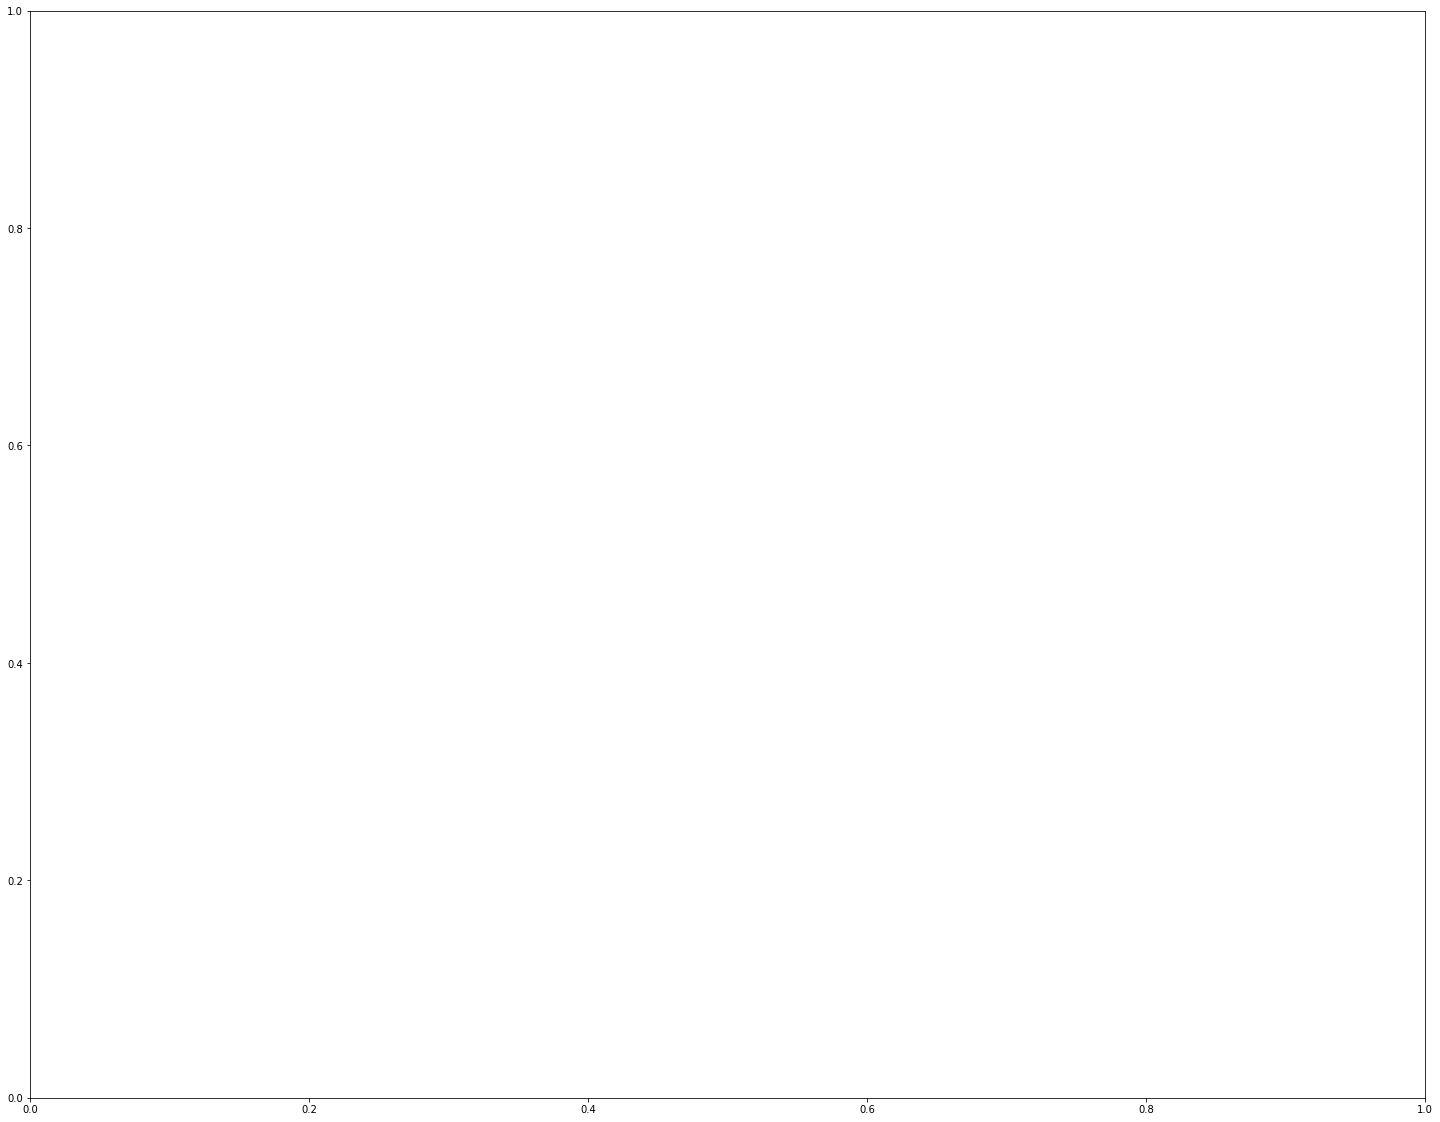

In [12]:
def correlation_heatmap(data):
    _, ax = plt.subplots(figsize = (25, 20))
    colormap= sns.diverging_palette(220, 10, as_cmap = True)
    ??

correlation_heatmap(data)

### Segregating variables - Dependent & Independent 

In [16]:
#seperating independent and dependent variables

data_x = data.drop(['Sale_Price'], axis=1)
data_y = data['Sale_Price']

### Q6: Which of these following will lead to right formations of train, test and validation set ?
    

In [14]:
from sklearn.model_selection import train_test_split as tts

* A

In [17]:
train1_x, test_x , train1_y, test_y = tts( data_x, data_y , test_size = 0.2 , random_state = 50)
train_x, val_x, train_y, val_y = tts(data_x, data_y, test_size = 0.2 , random_state = 51)

* B

In [ ]:
train1_x, test_x , train1_y, test_y = tts( data_x, data_y , test_size = 0.6 , random_state = 50)
train_x, val_x, train_y, val_y = tts(data_x, data_y, test_size = 0.6 , random_state = 51)

* C

In [ ]:
train1_x, test_x , train1_y, test_y = tts( data_x, data_y , test_size = 0.6 , random_state = 50)
train_x, val_x, train_y, val_y = tts(train1_x, train1_y, test_size = 0.6 , random_state = 51)

* D

In [ ]:
train1_x, test_x , train1_y, test_y = tts( data_x, data_y , test_size = 0.2 , random_state = 50)
train_x, val_x, train_y, val_y = tts(train1_x, train1_y, test_size = 0.2 , random_state = 51)

Ans : D

### Q7 : What is wrong with this code for scaling the data ?

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(data_x,data_y, random_state = 86)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_x = ss.fit_transform(train_x)
test_x = ss.fit_transform(test_x)

Ans : The tran set size has not been defined